1. What is the average TotalPayBenefits for each JobTitle? exclude ('Not Provided', 'Not provided')

In [3]:
import pandas as pd
import sqlite3 as sql

In [4]:
conn = sql.connect('database.sqlite')

In [5]:
conn

In [6]:
dir(sql)

['Binary',
 'Blob',
 'Connection',
 'Cursor',
 'DataError',
 'DatabaseError',
 'Date',
 'DateFromTicks',
 'Error',
 'IntegrityError',
 'InterfaceError',
 'InternalError',
 'LEGACY_TRANSACTION_CONTROL',
 'NotSupportedError',
 'OperationalError',
 'PARSE_COLNAMES',
 'PARSE_DECLTYPES',
 'PrepareProtocol',
 'ProgrammingError',
 'Row',
 'SQLITE_ABORT',
 'SQLITE_ABORT_ROLLBACK',
 'SQLITE_ALTER_TABLE',
 'SQLITE_ANALYZE',
 'SQLITE_ATTACH',
 'SQLITE_AUTH',
 'SQLITE_AUTH_USER',
 'SQLITE_BUSY',
 'SQLITE_BUSY_RECOVERY',
 'SQLITE_BUSY_SNAPSHOT',
 'SQLITE_BUSY_TIMEOUT',
 'SQLITE_CANTOPEN',
 'SQLITE_CANTOPEN_CONVPATH',
 'SQLITE_CANTOPEN_DIRTYWAL',
 'SQLITE_CANTOPEN_FULLPATH',
 'SQLITE_CANTOPEN_ISDIR',
 'SQLITE_CANTOPEN_NOTEMPDIR',
 'SQLITE_CANTOPEN_SYMLINK',
 'SQLITE_CONSTRAINT',
 'SQLITE_CONSTRAINT_CHECK',
 'SQLITE_CONSTRAINT_COMMITHOOK',
 'SQLITE_CONSTRAINT_FOREIGNKEY',
 'SQLITE_CONSTRAINT_FUNCTION',
 'SQLITE_CONSTRAINT_NOTNULL',
 'SQLITE_CONSTRAINT_PINNED',
 'SQLITE_CONSTRAINT_PRIMARYKEY',
 'SQLIT

In [7]:
def sql_query(q):
    return pd.read_sql_query(q,conn)

q = '''select * from sqlite_master'''

sql_query(q)
    

,type,name,tbl_name,rootpage,sql
0,table,Salaries,Salaries,2,CREATE TABLE Salaries (\n Id INTEGER PRIMAR...
1,index,salaries_year_idx,Salaries,16566,CREATE INDEX salaries_year_idx ON Salaries (Year)


In [8]:
q = '''Pragma table_info(Salaries)'''

sql_query(q)

,cid,name,type,notnull,dflt_value,pk
0,0,Id,INTEGER,0,None,1
1,1,EmployeeName,TEXT,0,None,0
2,2,JobTitle,TEXT,0,None,0
3,3,BasePay,NUMERIC,0,None,0
4,4,OvertimePay,NUMERIC,0,None,0
5,5,OtherPay,NUMERIC,0,None,0
6,6,Benefits,NUMERIC,0,None,0
7,7,TotalPay,NUMERIC,0,None,0
8,8,TotalPayBenefits,NUMERIC,0,None,0
9,9,Year,INTEGER,0,None,0


In [9]:
pd.read_sql_query('PRAGMA table_info(salaries)',conn)

,cid,name,type,notnull,dflt_value,pk
0,0,Id,INTEGER,0,None,1
1,1,EmployeeName,TEXT,0,None,0
2,2,JobTitle,TEXT,0,None,0
3,3,BasePay,NUMERIC,0,None,0
4,4,OvertimePay,NUMERIC,0,None,0
5,5,OtherPay,NUMERIC,0,None,0
6,6,Benefits,NUMERIC,0,None,0
7,7,TotalPay,NUMERIC,0,None,0
8,8,TotalPayBenefits,NUMERIC,0,None,0
9,9,Year,INTEGER,0,None,0


In [10]:
pd.read_sql_query('''select * from Sqlite_master where type = "table" ''', conn)

,type,name,tbl_name,rootpage,sql
0,table,Salaries,Salaries,2,CREATE TABLE Salaries (\n Id INTEGER PRIMAR...


In [11]:
pd.read_sql_query('''select * from Salaries where employeename is null''', conn)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status


In [12]:
#What is the average TotalPayBenefits for each JobTitle? exclude ('Not Provided', 'Not provided')

pd.read_sql_query('''select avg(totalpaybenefits), jobtitle from salaries where jobtitle not in('Not Provided', 'Not provided') group by jobtitle  order by avg(totalpaybenefits) desc''',conn)




,avg(totalpaybenefits),JobTitle
0,436224.360000,Chief Investment Officer
1,411732.266667,Chief of Police
2,408865.326667,"Chief, Fire Department"
3,399211.275000,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
4,380696.440000,"Gen Mgr, Public Trnsp Dept"
...,...,...
2153,673.800000,SPECIAL ASSISTANT XIV
2154,638.787879,"BOARD/COMMISSION MEMBER, GROUP III"
2155,475.047742,"BdComm Mbr, Grp2,M=$25/Mtg"
2156,296.511628,"BOARD/COMMISSION MEMBER, GROUP II"


In [13]:
pd.read_sql_query('''select * from Salaries where employeename not null''', conn)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


2. Which JobTitle has the most employees in each year? exclude ('Not Provided', 'Not provided')

In [14]:
pd.read_sql_query('''select jobtitle, count(jobtitle), year from salaries where jobtitle Not in('Not Provided', 'Not provioded')
group by jobtitle order by count(jobtitle) desc, year desc''',conn)

,JobTitle,count(jobtitle),Year
0,Transit Operator,7036,2012
1,Special Nurse,4389,2012
2,Registered Nurse,3736,2012
3,Public Svc Aide-Public Works,2518,2012
4,Police Officer 3,2421,2012
...,...,...,...
2154,WHARFINGER I,1,2011
2155,WINDOW CLEANER SUPERVISOR,1,2011
2156,WIRE ROPE CABLE MAINTENANCE SUPERVISOR,1,2011
2157,"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",1,2011


3. What is the total number of unique employees? exclude ('Not Provided', 'Not provided')

In [15]:
pd.read_sql_query('''select distinct count(employeename) from salaries ''', conn)

,count(employeename)
0,148654


4. Show All Employees Ordered By Their TotalPayBenefits In Descending Order? exclude ('Not Provided', 'Not provided')

In [16]:
pd.read_sql_query(''' select employeename, jobtitle, totalpaybenefits from salaries where jobtitle not in ('Not Provided', 'Not provided') order by totalpaybenefits desc''', conn)

,EmployeeName,JobTitle,TotalPayBenefits
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,567595.43
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),538909.28
2,David Shinn,Deputy Chief 3,510732.68
3,Amy P Hart,Asst Med Examiner,479652.21
4,William J Coaker Jr.,Chief Investment Officer,436224.36
...,...,...,...
148645,Roy I Tillery,Custodian,0.00
148646,Timothy E Gibson,Police Officer 3,-2.73
148647,Mark E Laherty,Police Officer 3,-8.20
148648,David P Kucia,Police Officer 3,-33.89


5. Show All Employees With A TotalPaybenefits Value Between 125,000 and 150,000 And A Job Title 'Firefighter'? exclude ('Not Provided', 'Not provided')

In [17]:
pd.read_sql_query('''select employeename, jobtitle, totalpaybenefits from salaries where totalpaybenefits between 125000 and 150000 and jobtitle not in('Not Provided', 'Not provided') and jobtitle == 'Firefighter'  ''', conn)

,EmployeeName,JobTitle,TotalPayBenefits
0,Randall Henderson,Firefighter,147912.75
1,Virginia Cheung,Firefighter,147862.14
2,Travis Hemenez,Firefighter,147664.12
3,Gail Readdie,Firefighter,147452.17
4,Gregory Ginotti,Firefighter,147216.47
...,...,...,...
110,Stephen J Kloster,Firefighter,126784.13
111,Jeffrey D Ryan,Firefighter,126687.13
112,Jovan R Blake,Firefighter,126169.62
113,Dino M Cafferata,Firefighter,125680.52


6. How many employees have no overtime pay or other pay? exclude ('Not Provided', 'Not provided')


In [18]:
pd.read_sql_query('''select count(employeename) from salaries where employeename not In('Not Provided', 'Not provided') and overtimepay ==0  or otherpay ==0''',conn)

,count(employeename)
0,84266


In [19]:
pd.read_sql_query('''select count(employeename) from Salaries
where EmployeeName Not In("Not Provided", "Not provided") and OvertimePay == 0 and OtherPay == 0
''', conn)

,count(employeename)
0,34655


7. Show top 10 employees having (overtimepay+OtherPay) in bar plot?  exclude ('Not Provided', 'Not provided')

8. Show The Average of BasePay, OverTime, OtherPay for all employees in pie chart? exclude ('Not Provided', 'Not provided')


In [20]:
pd.read_sql_query(''' select avg(basepay), avg(overtimepay), avg(otherpay) from salaries''', conn)

,avg(basepay),avg(overtimepay),avg(otherpay)
0,66053.729288,5065.923568,3648.669115


In [21]:
p = pd.read_sql_query(''' select avg(basepay), avg(overtimepay), avg(otherpay) from salaries''', conn)




In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
x_data = np.random.random(5)*100
y_data = np.random.random(5)*100
print(x_data, y_data)

[78.08886798 37.11934665 60.44190504  3.47204937 26.26642641] [68.20033083 10.54290363 18.57238325 54.33331468 49.60944111]


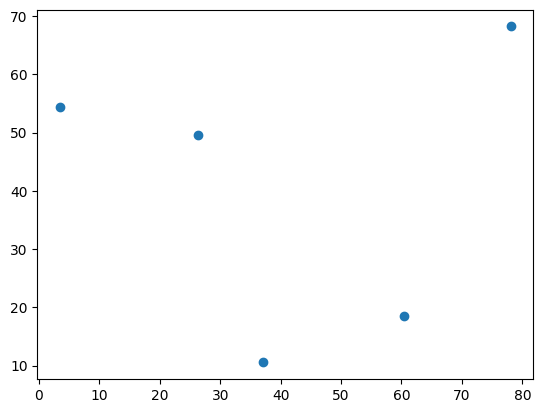

In [24]:
plt.scatter(x_data, y_data)
plt.show()

<BarContainer object of 4 artists>

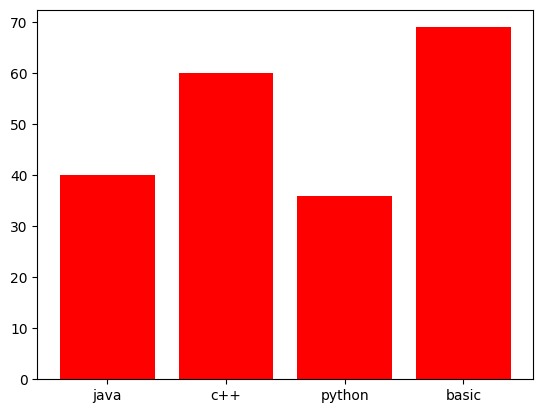

In [25]:
lang = ['java', 'c++', 'python', 'basic'] 
votes = [40,60,36,69]

plt.bar(lang,votes, color='red', ecolor='yellow')

In [26]:
age= np.random.normal(15, 2,5)
age

array([16.77300117, 15.85318642, 13.32586964, 15.37060898, 10.99103174])

(array([1., 0., 0., 0., 1., 0., 0., 1., 1., 1.]),
 array([10.99103174, 11.56922868, 12.14742563, 12.72562257, 13.30381951,
        13.88201646, 14.4602134 , 15.03841034, 15.61660729, 16.19480423,
        16.77300117]),
 <BarContainer object of 10 artists>)

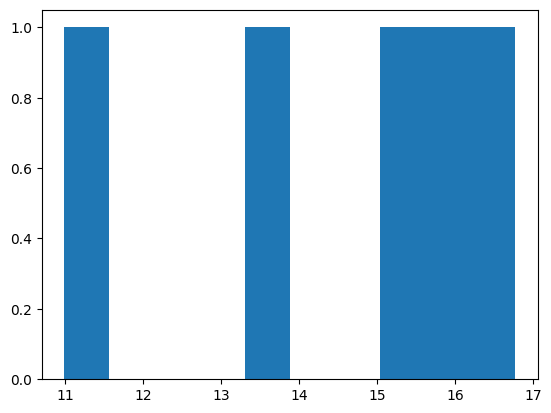

In [27]:
plt.hist(age, bins = 10)

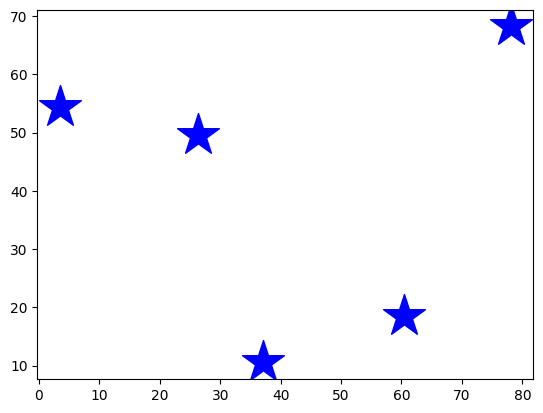

In [28]:
plt.scatter(x_data, y_data, marker='*', c='blue', s=1000 )

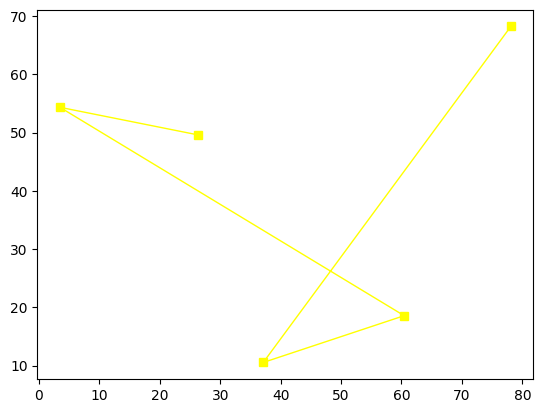

In [29]:
plt.plot(x_data, y_data, linewidth=1, c='yellow', marker='s')

In [30]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [37]:
plt.style.use('petroff10')

In [39]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

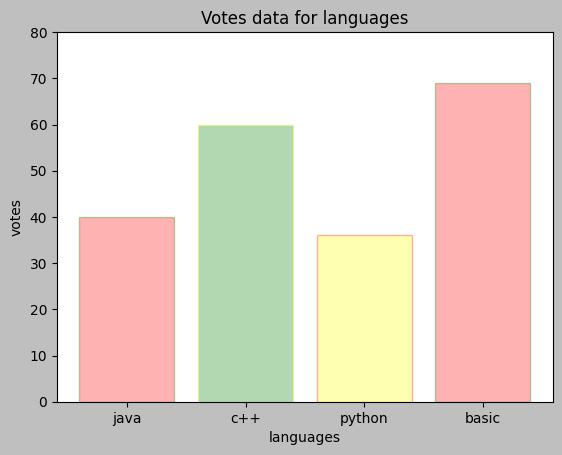

In [38]:

plt.bar(lang, votes, color=['red','green','yellow'], edgecolor=['green','yellow', 'red'], alpha=.3)
plt.title('Votes data for languages')
plt.ylabel('votes')
plt.xlabel('languages')
ytick = list(range(0,80,5))
#plt.yticks(ytick, [f'{x}k' for x in ytick])
plt.yticks([0,10,20,30,40,50,60,70,80])
plt.show()

([<matplotlib.patches.Wedge at 0x1e5c6363b10>,
 [Text(0.9815152542641761, 0.6903823619174596, 'java'),
  Text(-0.5979241775767966, 0.923302051264434, 'c++'),
  Text(-0.9781867324960154, -0.5031408514211195, 'python'),
  Text(0.54023910654186, -0.9581971132094131, 'basic')])

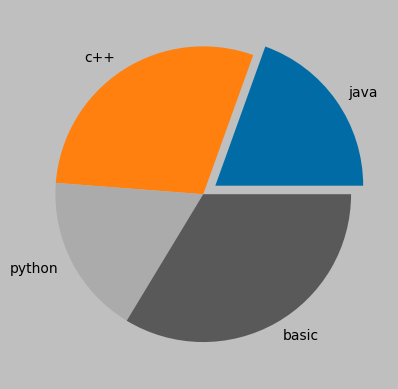

In [36]:
plt.pie(votes, labels = lang, explode=[0.1,0,0,0])

9. Get the average TotalPayBenefits for each JobTitle, but only for those with an average pay greater than 75000? exclude ('Not Provided', 'Not provided')


10. Get the number of employees (EmployeeName) for each JobTitle, where the count is greater than 10?  exclude ('Not Provided', 'Not provided')


In [41]:
df = list([3,4,5,6,7])

In [42]:
df

[3, 4, 5, 6, 7]

In [43]:
type(df)

list

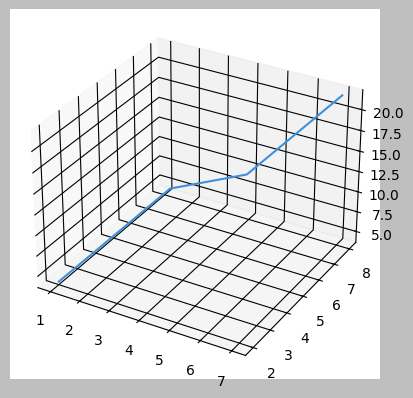

In [56]:
ax = plt.axes(projection = "3d")
x = [1,2,3,5,6,7]
y = [2,3,5,6,7,8]
z = [4,8,12,14,18,22]

ax.plot(x,y,z)
plt.show()